<a href="https://colab.research.google.com/github/annettembeyu/unsupervised-learning-techniques-in-R/blob/main/Moringa_School_DSC_Association_Rules_week14_Annette_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carre Four Sales Analysis



## Defining the Research Question


*   Identify identify the items that are most likely to be in the same basket when shopping.




## Context

The project entails analysing supermarket transaction containing the different items bought by customer. 

## Metric of Success

The research will have achieved its objective when:

*  correct identification of the rules of associations for items bought and the likelihood of items to be in the same basket.

## Details of the data

The dataset has 7501 rows and 20 columns. The attributes in the data are as follows:

 * shrimp
 * almonds
 * avocado
 * vegetables mix
 * green grapes
 * whole weat flour
 * yams
 * cottage cheese
 * energy drink
 * tomato juice
 * low fat yogurt
 * green tea
 * honey 
 * salad
 * mineral water
 * salmon
 * antioxydant juice
 * frozen smoothie
 * spinach
 * olive.oil 

## Data appropriateness

The information gathered is appropriate to draw insight on the buying trends of customers in terms of the items that are most likely to be bought together.

## Experimental Design

*  Loading and previewing the dataset 
*  Data Description
*  Data Cleaning;
*  Exploratory Data Analysis
* Implementing the Solution
*  Challenging the Solution
*  Conclusion
   

## Loading and previewing the dataset 

In [1]:
# Loading the relevant library necessary to read the data in the correct format
install.packages("tidyverse")
install.packages("readr")
install.packages("data.table", dependencies= TRUE)
library(tidyverse)  # data manipulation and visualization
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
# Installing and loading the relevant package for association analysis
suppressWarnings(
        suppressMessages(if
                         (!require(arules, quietly=TRUE))
                install.packages("arules")))
library(arules)

In [3]:
# Loading the dataset
sales_df <- read.transactions("Supermarket_Sales_Dataset II.csv",sep=",")

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [4]:
# previewing the dataset by looking at the first 6 rows
inspect(sales_df[1:6])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 
[6] {low fat yogurt}   


In [5]:
# previewing the dataset by looking at the last 6 rows
inspect(sales_df[7495:7500])

    items              
[1] {burgers,          
     dessert wine,     
     frozen smoothie,  
     milk,             
     oil,              
     pancakes,         
     pasta,            
     pepper,           
     shrimp,           
     tomatoes,         
     turkey,           
     whole wheat rice} 
[2] {light mayo,       
     pancakes}         
[3] {butter,           
     fresh bread,      
     light mayo}       
[4] {burgers,          
     eggs,             
     french fries,     
     frozen vegetables,
     green tea,        
     magazines}        
[5] {chicken}          
[6] {escalope,         
     green tea}        


 ## Data Description

In [6]:
# previewing the dataset to get the details
print('The datatypes of the attributes in the dataset:');str(sales_df)
print('The number of columns and rows consecutively are:');dim(sales_df)
print('The format of the dataset:');class(sales_df)

[1] "The datatypes of the attributes in the dataset:"
Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:29358] 0 1 3 32 38 47 52 53 59 64 ...
  .. .. ..@ p       : int [1:7502] 0 20 23 24 26 31 32 34 37 40 ...
  .. .. ..@ Dim     : int [1:2] 119 7501
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	119 obs. of  1 variable:
  .. ..$ labels: chr [1:119] "almonds" "antioxydant juice" "asparagus" "avocado" ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables
[1] "The number of columns and rows consecutively are:"


[1] 7501  119

[1] "The format of the dataset:"


[1] "transactions"
attr(,"package")
[1] "arules"

In [7]:
# determining the frequency of items bought
itemFrequency(sales_df[, 1:3])

almonds antioxydant juice         asparagus 
      0.020397280       0.008932142       0.004799360

**Observation**: In the output above the items that were frequently bought were almonds, antioxydant juice and asparagus.

In [8]:
# Statistical summaries for the numerical columns
summary(sales_df)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

# Exploratory Data Analysis

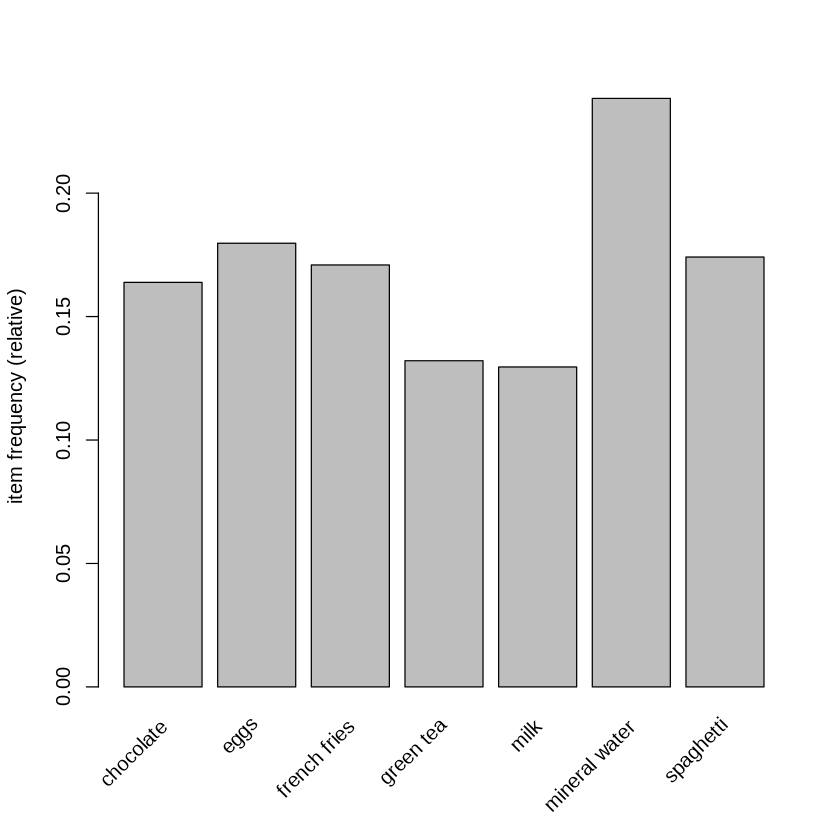

In [10]:
# plotting the frequency of items
itemFrequencyPlot(sales_df, support = 0.1)

**Observation**: From the graph the most frequent item demanded was mineral water,eggs, french fries and spaghetti

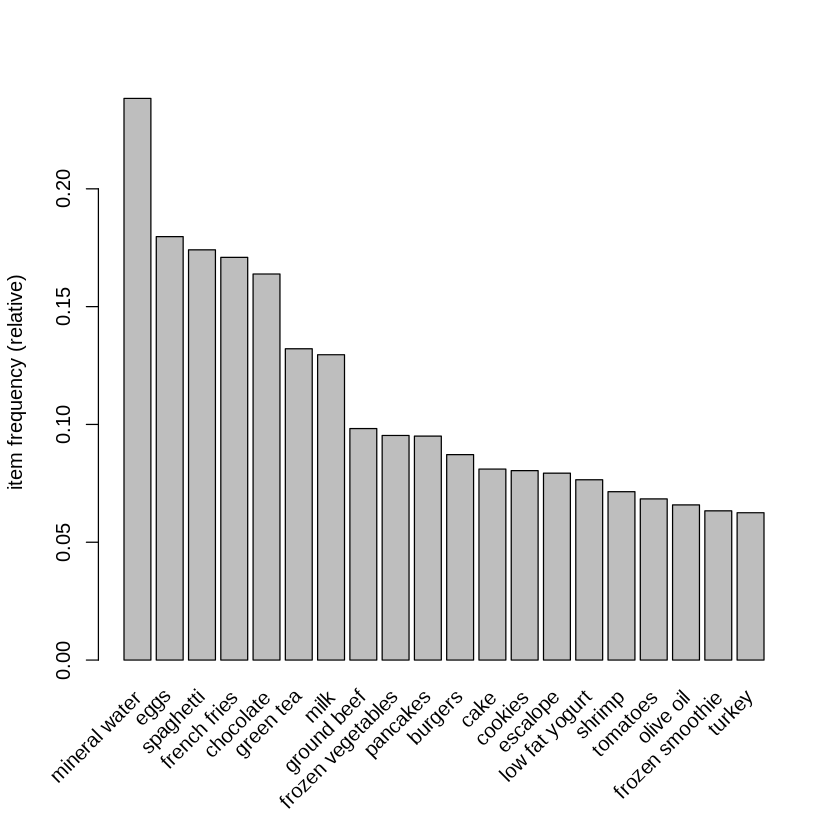

In [12]:
# getting the top 20 items that are frequently bought
itemFrequencyPlot(sales_df, topN = 20)

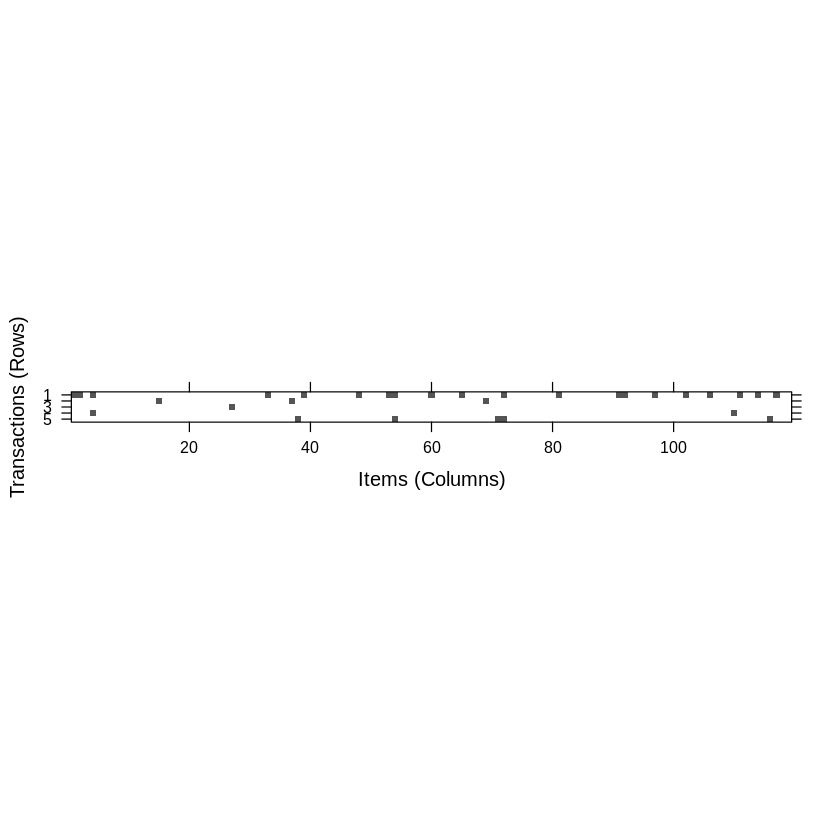

In [13]:
# visualization of the sparse matrix for the first five transactions
image(sales_df[1:5])

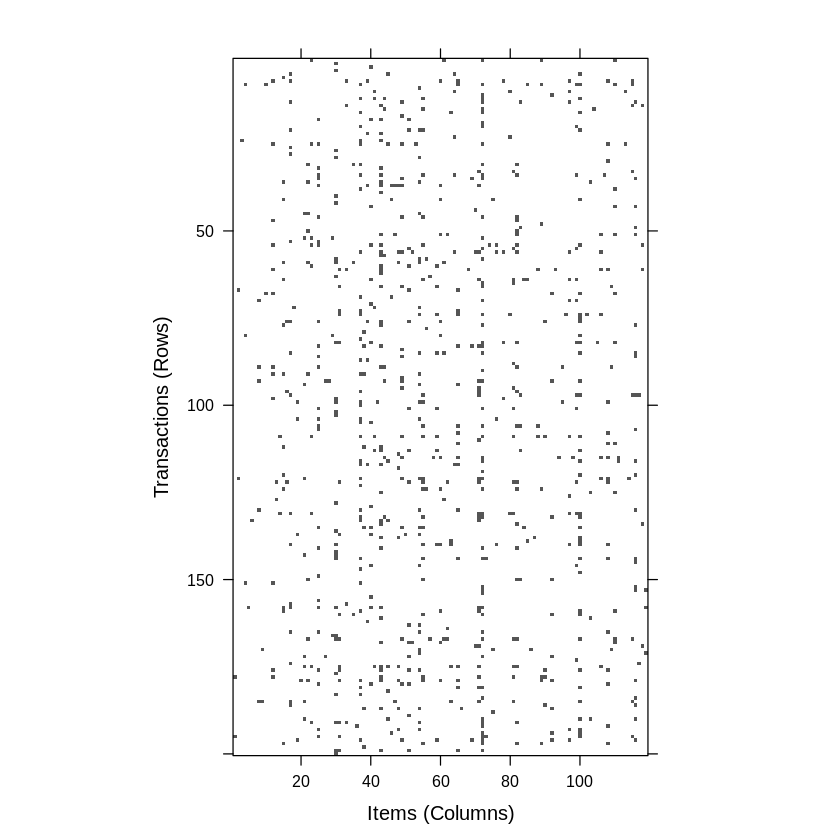

In [16]:
# visualization of a random sample of 200 transactions
image(sample(sales_df, 200))

## Impementing the Solution

In [17]:
# default settings with no rules
apriori(sales_df)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

In [18]:
# better support and confidence levels set to learn more rules
salesrules <- apriori(sales_df, parameter = list(support =
                                                      0.006, confidence = 0.25, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 45 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [97 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [272 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [19]:
# getting the rules that were established
salesrules

set of 272 rules 

In [20]:
# summary of sales association rules
summary(salesrules)

set of 272 rules

rule length distribution (lhs + rhs):sizes
  2   3 
 90 182 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.669   3.000   3.000 

summary of quality measures:
    support           confidence        coverage            lift      
 Min.   :0.006133   Min.   :0.2500   Min.   :0.01133   Min.   :1.054  
 1st Qu.:0.006932   1st Qu.:0.2854   1st Qu.:0.02040   1st Qu.:1.561  
 Median :0.008532   Median :0.3241   Median :0.02573   Median :1.783  
 Mean   :0.011492   Mean   :0.3454   Mean   :0.03502   Mean   :1.872  
 3rd Qu.:0.012132   3rd Qu.:0.3960   3rd Qu.:0.03919   3rd Qu.:2.067  
 Max.   :0.059725   Max.   :0.5765   Max.   :0.23837   Max.   :4.122  
     count      
 Min.   : 46.0  
 1st Qu.: 52.0  
 Median : 64.0  
 Mean   : 86.2  
 3rd Qu.: 91.0  
 Max.   :448.0  

mining info:
     data ntransactions support confidence
 sales_df          7501   0.006       0.25

**Observation**: sales data contained 7501 transactions, was used to construct rules with a minimum support of 0.006 and minimum confidence of 0.25.
 With support of 0.006 and confidence of 0.25, implies that for a given rule it will cover 0.6 percent of the transactions and is correct in 40 percent of purchases involving another product. The lift value tells  how much more likely a customer is to buy a given product relative to the average customer, given that he or she bought a particular plot prior.

In [21]:
# looking at the first 5 rules
inspect(salesrules[1:5])

    lhs               rhs             support     confidence coverage  
[1] {tomato sauce} => {spaghetti}     0.006265831 0.4433962  0.01413145
[2] {light cream}  => {mineral water} 0.007332356 0.4700855  0.01559792
[3] {protein bar}  => {mineral water} 0.007732302 0.4172662  0.01853086
[4] {meatballs}    => {spaghetti}     0.006399147 0.3057325  0.02093054
[5] {meatballs}    => {mineral water} 0.007732302 0.3694268  0.02093054
    lift     count
[1] 2.546642 47   
[2] 1.972098 55   
[3] 1.750511 58   
[4] 1.755972 48   
[5] 1.549815 58   


## Challenging the Solution

In [22]:
# sorting sales  rules by lift
inspect(sort(salesrules, by = "lift")[1:5])

    lhs                              rhs                 support     confidence
[1] {whole wheat pasta}           => {olive oil}         0.007998933 0.2714932 
[2] {herb & pepper,spaghetti}     => {ground beef}       0.006399147 0.3934426 
[3] {herb & pepper,mineral water} => {ground beef}       0.006665778 0.3906250 
[4] {spaghetti,tomatoes}          => {frozen vegetables} 0.006665778 0.3184713 
[5] {herb & pepper}               => {ground beef}       0.015997867 0.3234501 
    coverage   lift     count
[1] 0.02946274 4.122410  60  
[2] 0.01626450 4.004360  48  
[3] 0.01706439 3.975683  50  
[4] 0.02093054 3.341054  50  
[5] 0.04946007 3.291994 120  


These rules are quite diffferent from the previous one. The first rule, with a lift of about 4.12, implies that people who buy whole wheat pasta are nearly four times more likely to buy olive oil than the typical customer.

Rule two:ground beef is over four times more likely to be found in a shopping cart with herb & pepper, spaghetti versus other carts, suggesting perhaps spiced beef  stew pairing?


In [25]:
spaghettirules <- subset(salesrules, items %in% "spaghetti")
inspect(spaghettirules[1:6])

    lhs                  rhs         support     confidence coverage   lift    
[1] {tomato sauce}    => {spaghetti} 0.006265831 0.4433962  0.01413145 2.546642
[2] {meatballs}       => {spaghetti} 0.006399147 0.3057325  0.02093054 1.755972
[3] {parmesan cheese} => {spaghetti} 0.006799093 0.3422819  0.01986402 1.965893
[4] {french wine}     => {spaghetti} 0.007732302 0.3431953  0.02253033 1.971139
[5] {fresh tuna}      => {spaghetti} 0.006799093 0.3053892  0.02226370 1.754000
[6] {pepper}          => {spaghetti} 0.009865351 0.3718593  0.02652980 2.135771
    count
[1] 47   
[2] 48   
[3] 51   
[4] 58   
[5] 51   
[6] 74   


**Observation**: The likelihood of spaghetti being in the same basket with the different products

In [26]:
# writing the rules to a CSV file
write(salesrules, file = "salesrules.csv",
      sep = ",", quote = TRUE, row.names = FALSE)

In [27]:
# converting the rule set to a data frame
salesrules_df <- as(salesrules, "data.frame")
str(salesrules_df)

'data.frame':	272 obs. of  6 variables:
 $ rules     : chr  "{tomato sauce} => {spaghetti}" "{light cream} => {mineral water}" "{protein bar} => {mineral water}" "{meatballs} => {spaghetti}" ...
 $ support   : num  0.00627 0.00733 0.00773 0.0064 0.00773 ...
 $ confidence: num  0.443 0.47 0.417 0.306 0.369 ...
 $ coverage  : num  0.0141 0.0156 0.0185 0.0209 0.0209 ...
 $ lift      : num  2.55 1.97 1.75 1.76 1.55 ...
 $ count     : int  47 55 58 48 58 51 58 51 49 57 ...


## Conclusion

 The Association Rule is very instrumental in looking at the items in customer transactions that are frequently bought. With the insights drawn from our analysis the marketing department can draw insights by looking into the products that are not frequently bought by introducing offers and reviewing the price list for products. For the goods that are frequentl bought find ways to sustain.